# Ejercicio 4.  Análisis de Clústeres

In [1]:
import pandas                as     pd
import matplotlib.pylab      as     plt
from   sklearn.preprocessing import LabelEncoder,MinMaxScaler
from   sklearn.cluster       import KMeans
from   sklearn.metrics       import silhouette_score,calinski_harabasz_score

_Haga un análisis de clústeres con kmeans y dbscan con los datos de “coris”. El análisis deberá
incluir el método del codo y las métricas de validación interna._

Iniciamos cargando los datos:

In [2]:
data = pd.read_csv('coris.csv')
data.head(2)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


### Iniciamos con el análisis usando el algoritmo KMeans.

Normalizamos los datos:

In [3]:
minmax_scaler=MinMaxScaler()
X_o = data.drop('row.names', axis=1)
X = minmax_scaler.fit_transform(X_o)

Y ejecutamos el algoritmo de KMeans, utilizando el **método del codo** para elegir el número de clústeres óptimo:

In [4]:
inercias = []
for i in range(1, 11):
    # El random_state lo usamos para fijar el número aleatorio con el que 
    # se generan los centroides.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

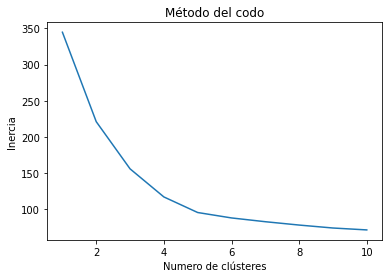

In [5]:
plt.plot(range(1, 11), inercias)
plt.title('Método del codo')
plt.xlabel('Numero de clústeres')
plt.ylabel('Inercia')
plt.show()

Vemos que el codo se forma en 5, por lo que elegiremos 5 como el número de clústeres para el modelo.

El codo no se ve tan claro, podría ser en 4 o en 5, por lo que haremos el análisis para ambos y elegiremos
el que obtenga mejor resultado:

In [6]:
clu=KMeans(n_clusters=5)
clu.fit(X)

KMeans(n_clusters=5)

Aplicamos como **métricas de validación interna**, el coeficiente de silhouette y el score de Calinki-Harbasz 

In [7]:
silhouette = silhouette_score(X,clu.labels_)
harbasz = calinski_harabasz_score(X,clu.labels_)
print("Silhouette: ", silhouette)
print("Calinski-Harbasz: ", harbasz)

Silhouette:  0.3920340867291316
Calinski-Harbasz:  298.8006250134576


Vemos que el codo se forma en 4, por lo que elegiremos 4 como el número de clústeres para el modelo.

In [8]:
clu=KMeans(n_clusters=4)
clu.fit(X)

KMeans(n_clusters=4)

Aplicamos como **métricas de validación interna**, el coeficiente de silhouette y el score de Calinki-Harbasz 

In [9]:
silhouette = silhouette_score(X,clu.labels_)
harbasz = calinski_harabasz_score(X,clu.labels_)
print("Silhouette: ", silhouette)
print("Calinski-Harbasz: ", harbasz)

Silhouette:  0.4467517779197794
Calinski-Harbasz:  297.52260406806795


Elegimos $K=4$ pues el coeficiente de silhouette es mucho mayor. 

### Ahora hacemos el análisis con DBScan

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

Ejecutamos el algoritmo de DBSCAN

In [11]:
dbscan=DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan.fit(X)

DBSCAN()

Métricas de validación interna:

In [12]:
silhouette = silhouette_score(X,dbscan.labels_)
harbasz = calinski_harabasz_score(X,dbscan.labels_)
print("Silhouette: ", silhouette)
print("Calinski-Harbasz: ", harbasz)


Silhouette:  0.43812140640162145
Calinski-Harbasz:  214.65563851001073


Vemos que con este algoritmo logramos un score de silhoutte casi igual al de KMeans, pero en este caso sin tener que hacer una optimización de hiperparámetros.

**Visualización en R^2 usando PCA** <br>

Visualizamos, en el plano (pc1, pc2) de las componentes principales, los clústeres encontrados por ambos algoritmos:

**Con DBScan**

In [13]:
pca=PCA(n_components=2).fit(X)
pca_2d=pca.transform(X)

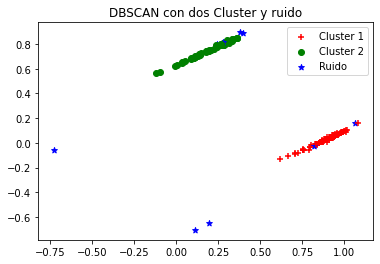

In [14]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Ruido'])
plt.title('DBSCAN con dos Cluster y ruido')
plt.show()

**Con KMeans**

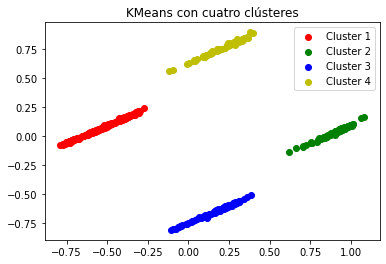

In [15]:
colors = ['r', 'g', 'b', 'y', 'k']
for i in range(0, pca_2d.shape[0]):
    if clu.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif clu.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif clu.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='o')
    elif clu.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='o')
plt.legend([c1,c2,c3,c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('KMeans con cuatro clústeres')
plt.show()